# Logistic Regression

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\gedda\Downloads\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [8]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

C:\Users\gedda\AppData\Local\Temp\ipykernel_497552\1950010530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.Age)


<Axes: ylabel='Density'>

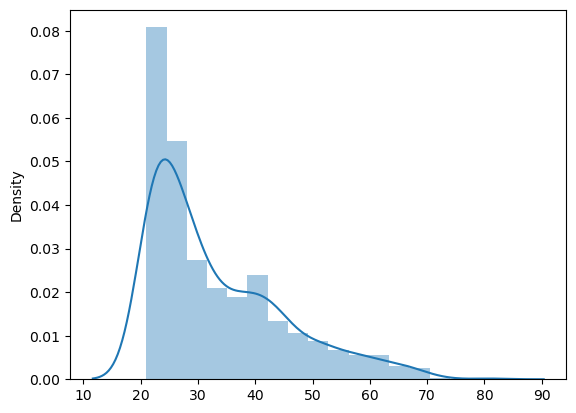

In [9]:
sns.distplot(x=df.Age)

C:\Users\gedda\AppData\Local\Temp\ipykernel_497552\675120972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.Pregnancies)


<Axes: ylabel='Density'>

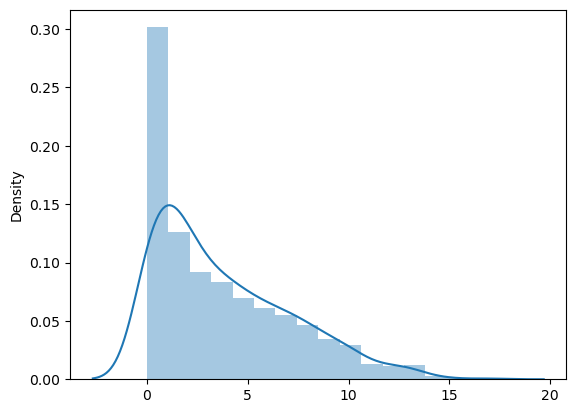

In [10]:
sns.distplot(x=df.Pregnancies)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x= df.drop(["Outcome"],axis=1)

In [14]:
y =df.Outcome

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

C:\Users\gedda\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
pred = lr.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

In [21]:
print(lr.score(x_train, y_train))

0.7817589576547231


In [22]:
print(lr.score(x_test,y_test))

0.7792207792207793


In [23]:
print(accuracy_score(y_test,pred))

0.7792207792207793


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

In [26]:
fpr, tpr,threshold= roc_curve(y_test,pred)

In [27]:
score= roc_auc_score(y_test, pred)

In [28]:
print(score)

0.7272727272727273


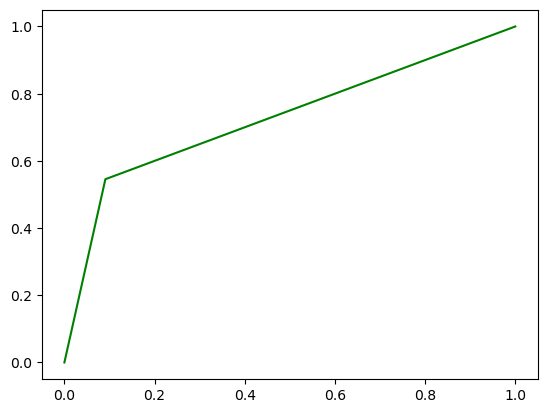

In [29]:
plt.plot(fpr,tpr,color="green")

# Decision Tree

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
data = pd.read_csv(r'C:\Users\gedda\Downloads\pima-indians-diabetes.csv',header=None)

In [32]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'Target']

In [34]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [35]:
data.columns = col_names

In [36]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
data.shape

(768, 9)

In [38]:
data.duplicated().sum()

0

In [39]:
data.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
Target        int64
dtype: object

In [40]:
data.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
Target      0
dtype: int64

<Axes: xlabel='pregnant', ylabel='count'>

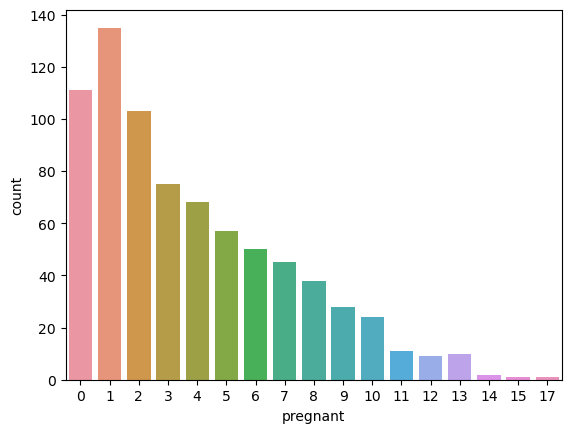

In [41]:
sns.countplot(x=data.pregnant)

C:\Users\gedda\AppData\Local\Temp\ipykernel_497552\26326611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.glucose)


<Axes: ylabel='Density'>

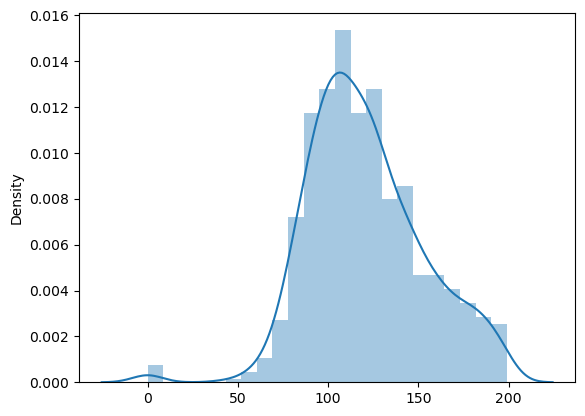

In [42]:
sns.distplot(x=data.glucose)

C:\Users\gedda\AppData\Local\Temp\ipykernel_497552\1719125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.bp)


<Axes: ylabel='Density'>

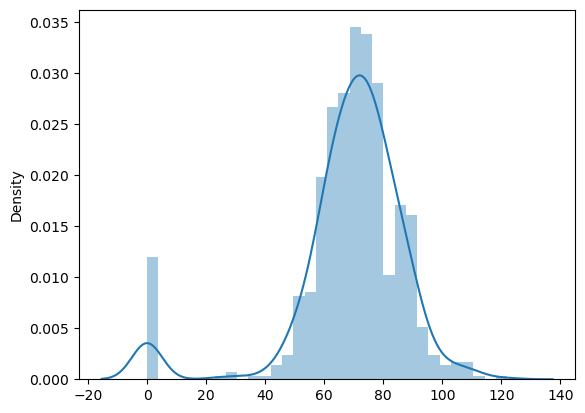

In [43]:
sns.distplot(x=data.bp)

C:\Users\gedda\AppData\Local\Temp\ipykernel_497552\2176378535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.age)


<Axes: ylabel='Density'>

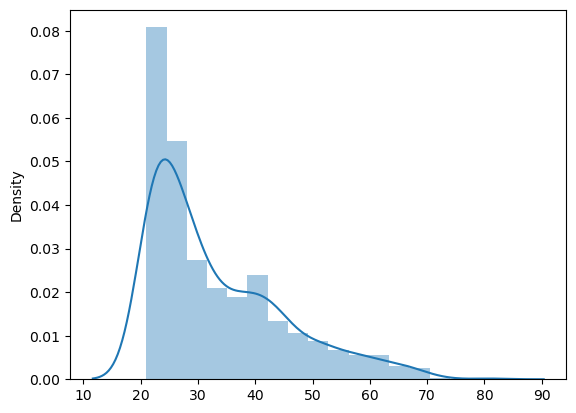

In [44]:
sns.distplot(x=data.age)

<Axes: xlabel='age'>

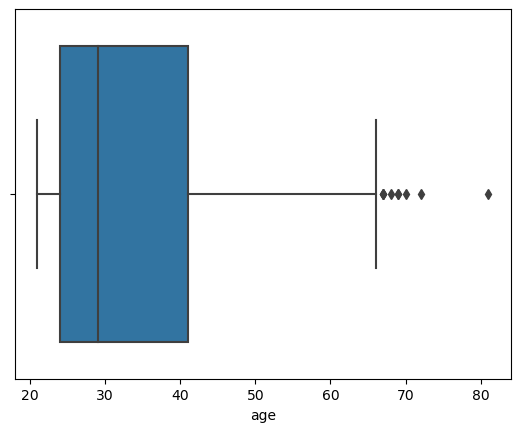

In [45]:
sns.boxplot(x=data.age)

<Axes: xlabel='bp'>

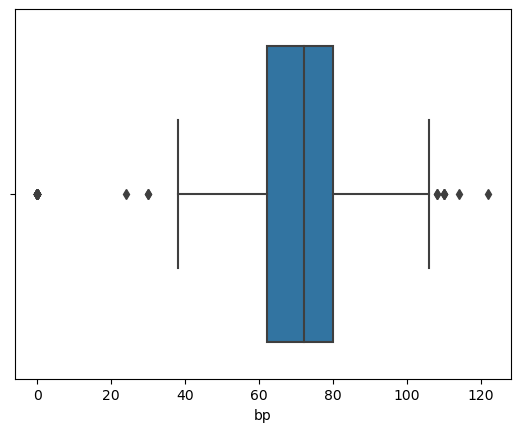

In [46]:
sns.boxplot(x=data.bp)

In [47]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']

X = data[feature_cols]
y = data.Target 

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [49]:
clf = DecisionTreeClassifier()

In [50]:
clf

DecisionTreeClassifier()

In [51]:
clf = clf.fit(x_train,y_train)

In [52]:
y_pred = clf.predict(x_test)

In [53]:
clf.score(x_train,y_train)

1.0

In [54]:
clf.score(x_test,y_test)

0.6753246753246753

In [55]:
y.value_counts()

0    500
1    268
Name: Target, dtype: int64

In [56]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [57]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        95
           1       0.58      0.54      0.56        59

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.67      0.68      0.67       154



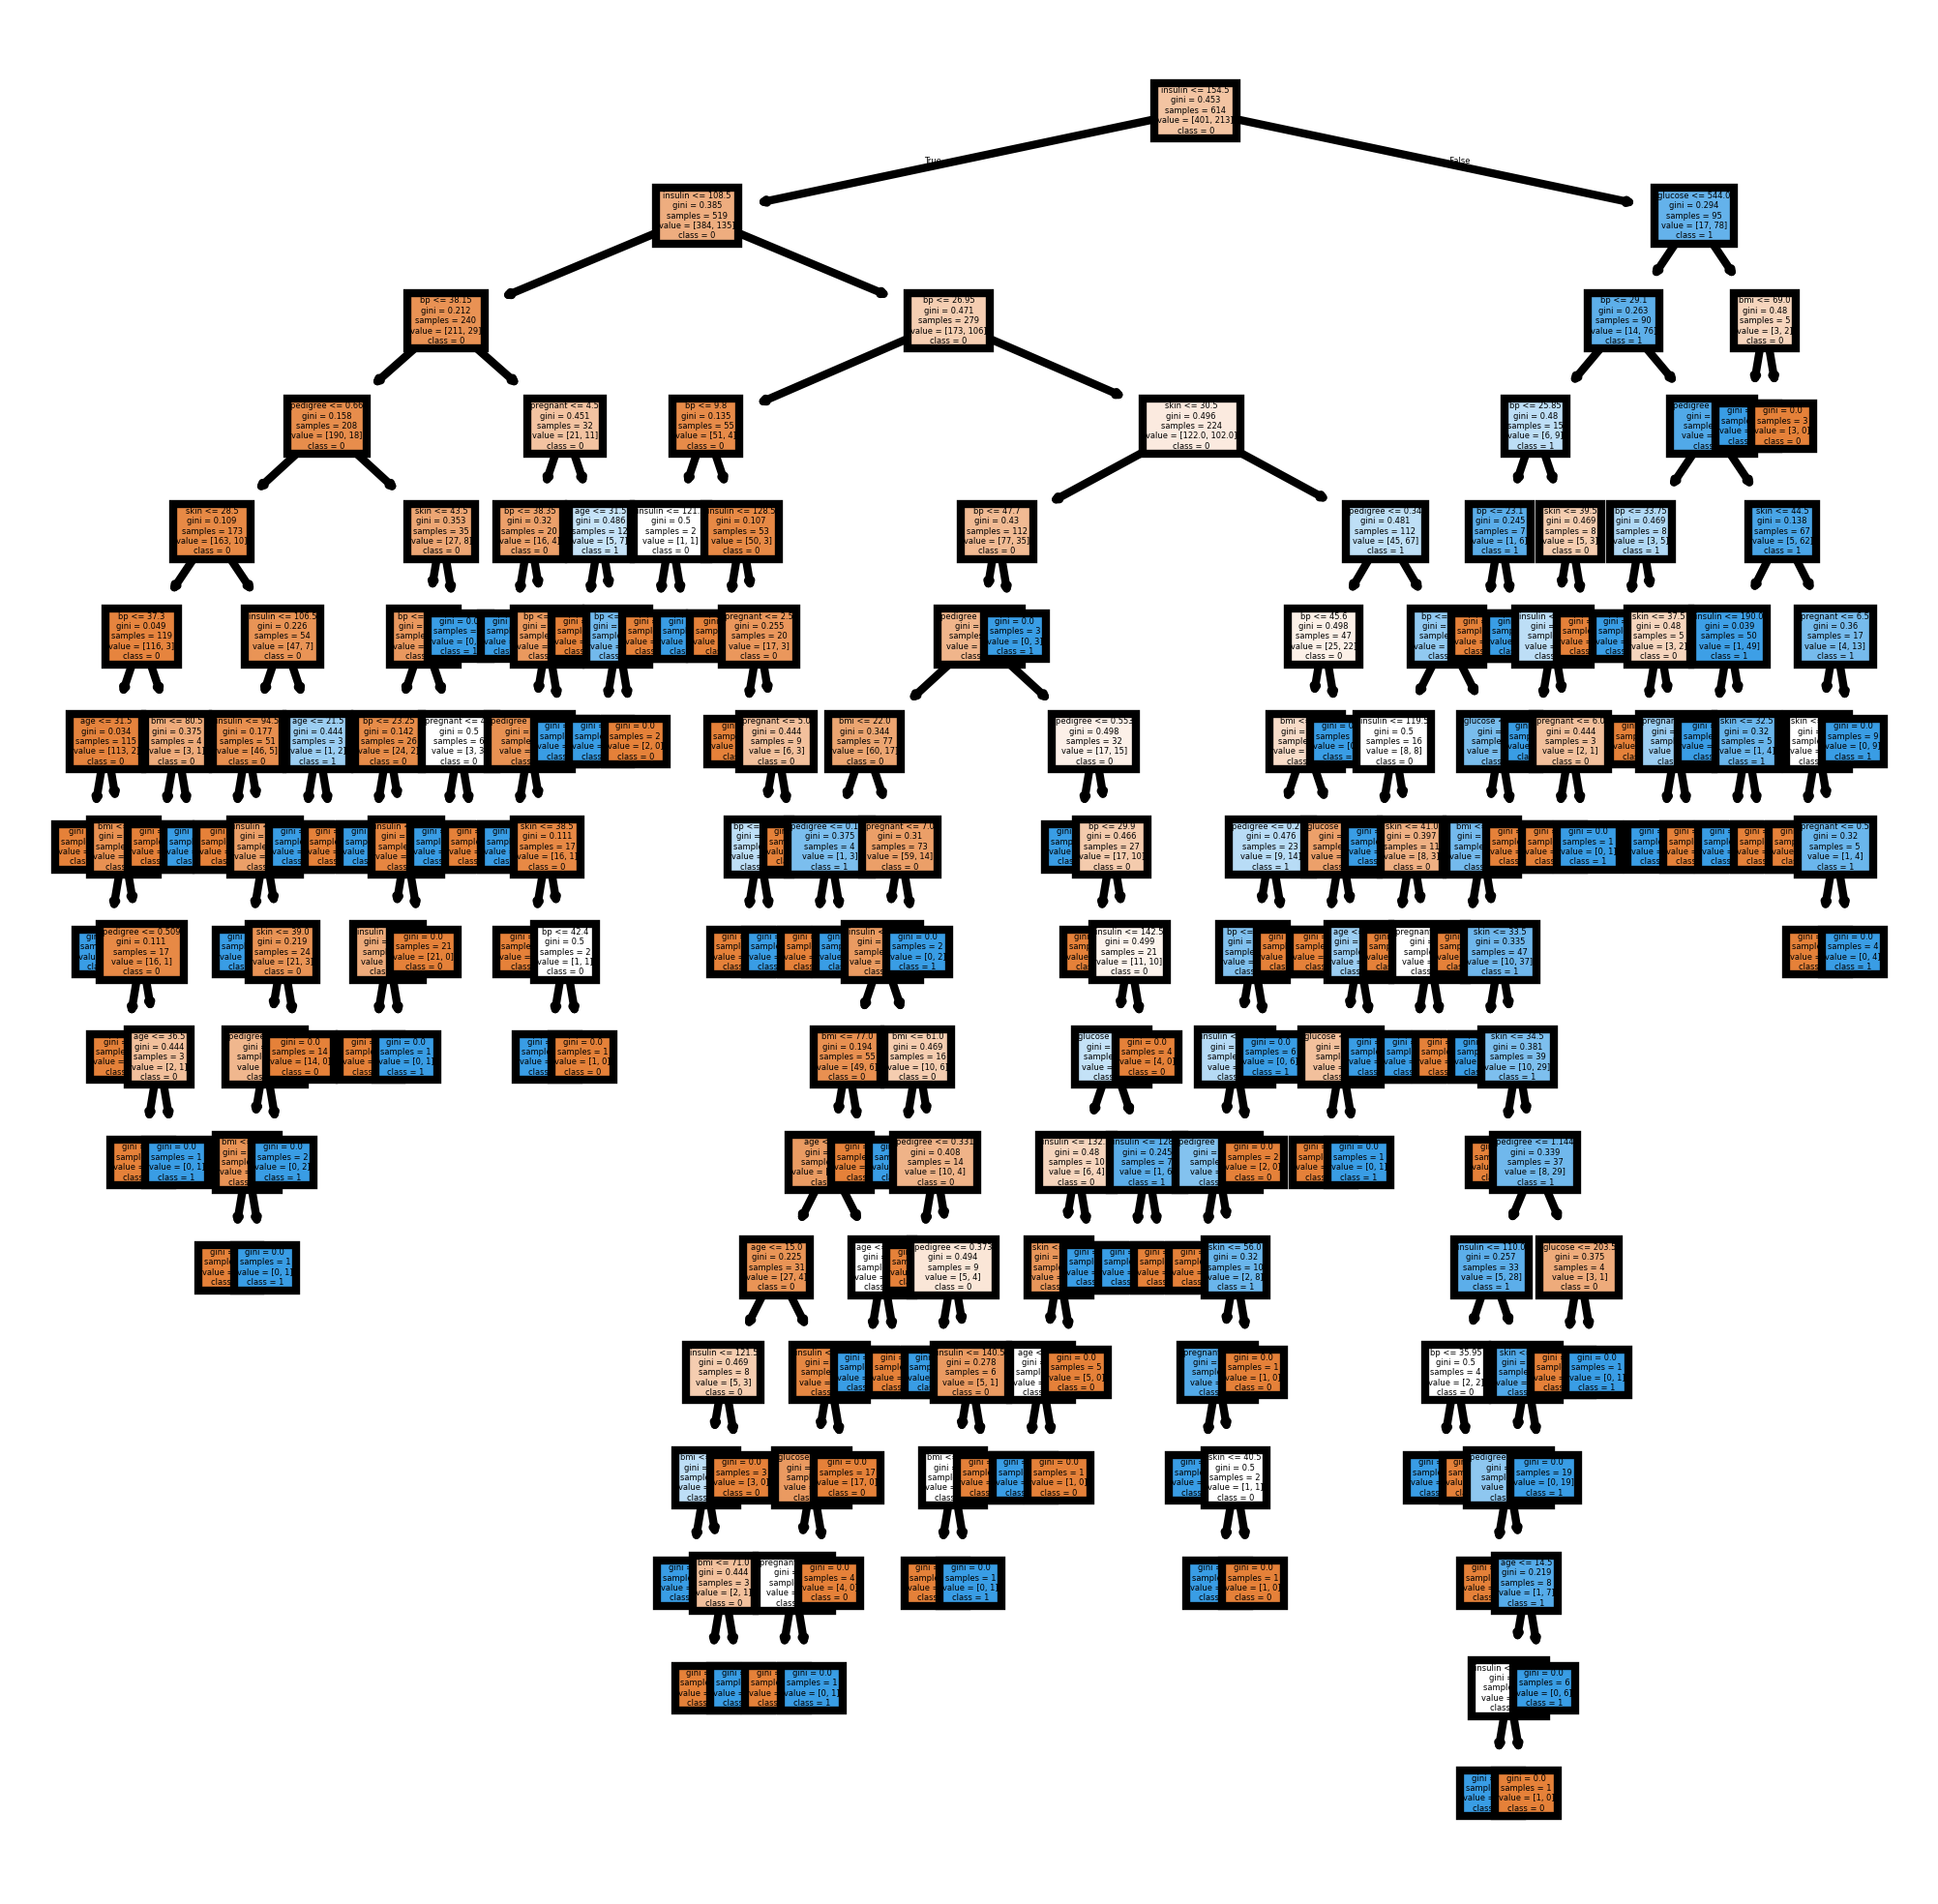

In [58]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);



In [59]:
parameterstree = DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 7,
                                        min_samples_split = 2,
                                        min_samples_leaf = 2, 
                                        max_features = 6,
                                       random_state=200)

In [60]:
parameterstree.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=2, random_state=200, splitter='random')

In [61]:
y_pred_param = parameterstree.predict(X_test)

In [62]:
parameterstree.score(X_train,y_train)

0.7947882736156352

In [63]:
parameterstree.score(X_test,y_test)

0.6753246753246753

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.6753246753246753


In [65]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       123
           1       0.33      0.58      0.42        31

    accuracy                           0.68       154
   macro avg       0.60      0.64      0.60       154
weighted avg       0.76      0.68      0.70       154



In [66]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [67]:
from imblearn.over_sampling import RandomOverSampler

rs = RandomOverSampler(random_state=51)


In [68]:
x_re, y_re = rs.fit_resample(X,y)

In [69]:
x_re.shape

(1000, 8)

In [70]:
y_re.shape

(1000,)

In [71]:
y_re.value_counts()

1    500
0    500
Name: Target, dtype: int64

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=.2,random_state=51)

In [73]:
parameterstree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=2, random_state=200, splitter='random')

In [74]:
pred1=parameterstree.predict(x_test)

In [75]:
parameterstree.score(x_train,y_train)

0.745

In [76]:
parameterstree.score(x_test,y_test)

0.595

In [77]:
from imblearn.under_sampling import RandomUnderSampler

In [78]:
ru=RandomUnderSampler()

In [79]:
xru,yru=ru.fit_resample(X,y)

In [80]:
xru.shape

(536, 8)

In [81]:
yru.value_counts()

0    268
1    268
Name: Target, dtype: int64

In [82]:
x_train,x_test,y_train,y_test=train_test_split(xru,yru,test_size=0.2,random_state=52)

In [83]:
parameterstree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=2, random_state=200, splitter='random')

In [84]:
pred2=parameterstree.predict(x_test)

In [85]:
parameterstree.score(x_train,y_train)

0.764018691588785

In [86]:
parameterstree.score(x_test,y_test)

0.6851851851851852

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
sm=SMOTE()

In [89]:
x_s,y_m=sm.fit_resample(X,y)

In [90]:
y_m.value_counts()

1    500
0    500
Name: Target, dtype: int64

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x_s,y_m,test_size=.2,random_state=25)

In [92]:
parameterstree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=2, random_state=200, splitter='random')

In [93]:
pred3=parameterstree.predict(x_test)

In [94]:
parameterstree.score(x_train,y_train)

0.785

In [95]:
parameterstree.score(x_test,y_test)

0.76

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
lr = RandomForestClassifier(n_estimators=100)

In [99]:
lr.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
pred5=lr.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score,classification_report

In [102]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.87      0.84      0.86        96

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

